In [1]:
import matplotlib.pyplot as plt 
import sys as sys 
sys.path.append('../src/')
from lbm_num import * 

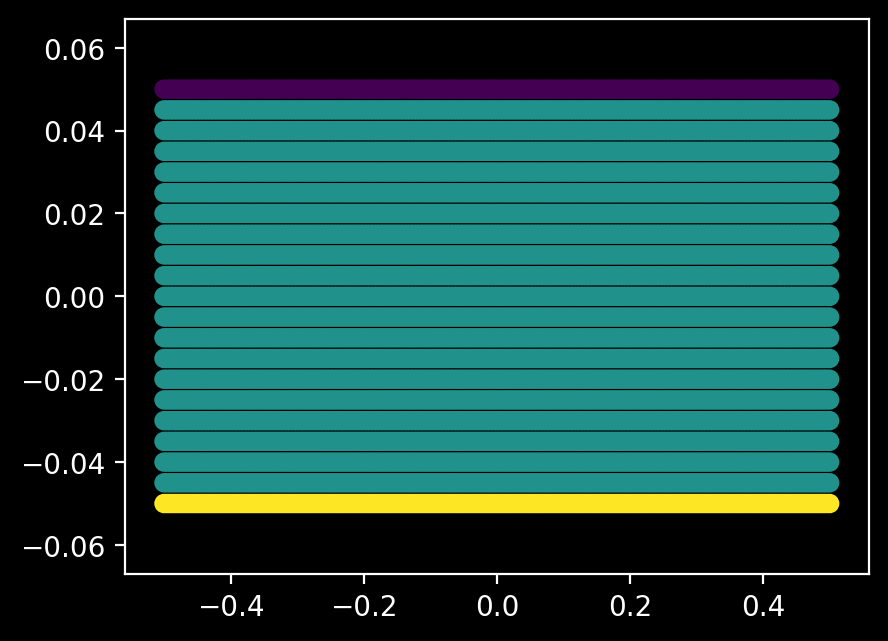

In [3]:
#Physical parameters 
nu = 0.1
Pref = 101325
Tref = 300
Rgas = 287.15
vforce = 9.81
#Latice 
D = 2 
Q = 9 
#Time step 
Dt = 0.000001
#Create Fluid domain and Grid 
Dx = 0.005#0.001
Lx = 1#0.1
Ly = 0.1
Nx = np.int((Lx/Dx) + 1)
Ny = np.int((Ly/Dx) + 1)
x = np.linspace(-Lx/2,Lx/2,Nx)
y = np.linspace(-Ly/2,Ly/2,Ny)
xv, yv = np.meshgrid(x, y,indexing = 'ij')
#Boundaries 
label = np.zeros((Nx,Ny))
normaly = np.zeros((Nx,Ny))
normalx = np.zeros((Nx,Ny))
label[:,0] = 1 
label[:,Ny-1] = 1 
normaly[:,0] = 1
normalx[:,0] = 0
normaly[:,Ny-1] = -1
normalx[:,Ny-1] = 0
#
plt.scatter(xv,yv,c=normaly)
plt.show()
#Initial condition 
ux = np.zeros((Nx,Ny))
uy = np.zeros((Nx,Ny))
P = np.ones((Nx,Ny)) * Pref
for i in range(Nx):
    for j in range(Ny):
        R = 0.004/Dx
        xCentered =  i-(Nx-1.)/2.#xv[i,j] 
        yCentered =  j-(Ny-1.)/2.#yv[i,j]
        #P[i,j] = Pref+ 0.1 * Pref * np.exp(-(xCentered*xCentered+yCentered*yCentered)/(4*R*R))
rho = P/(Rgas*Tref) 


0


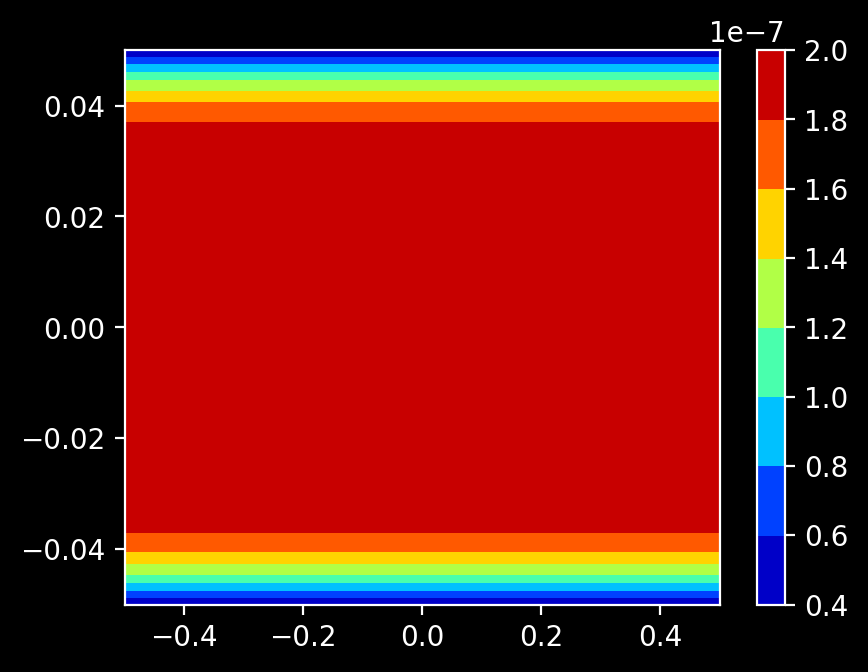

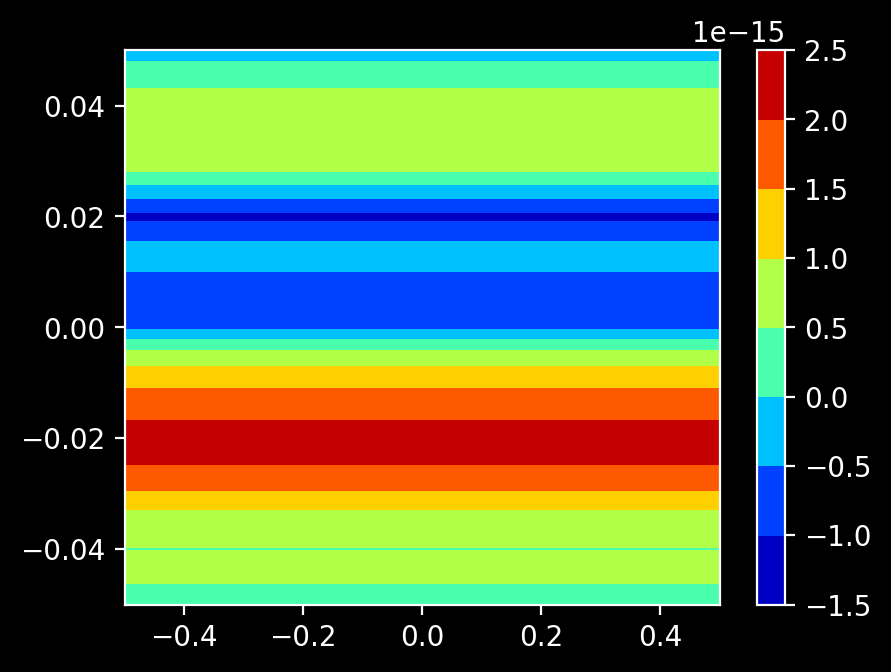

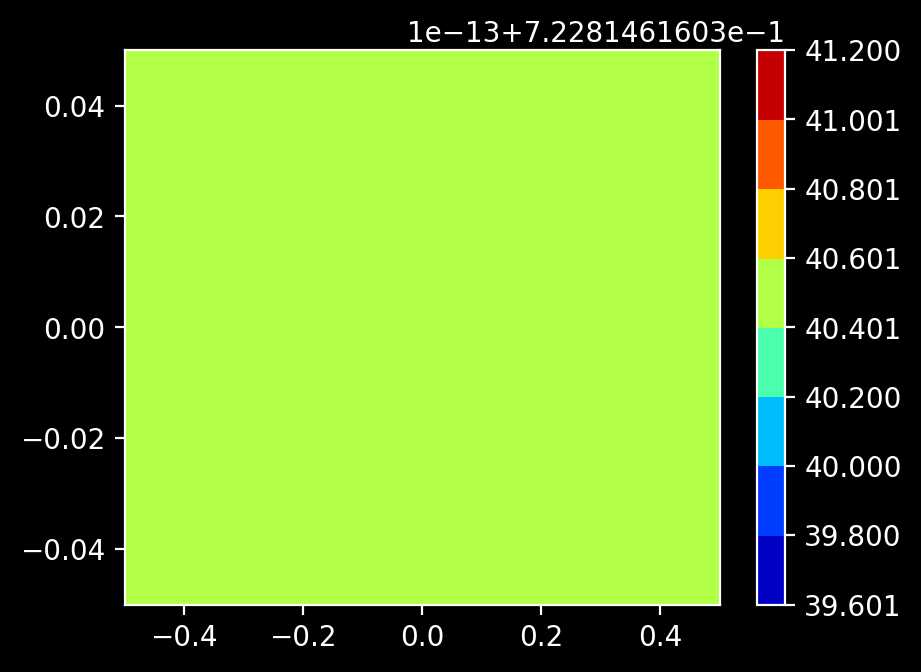

10
20
30
40
50
60
70
80
90
100


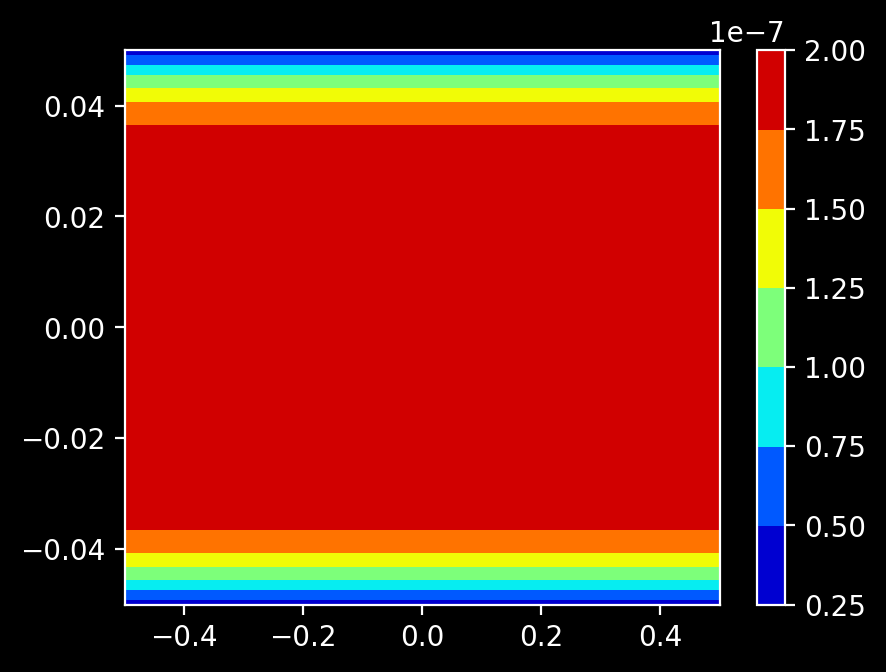

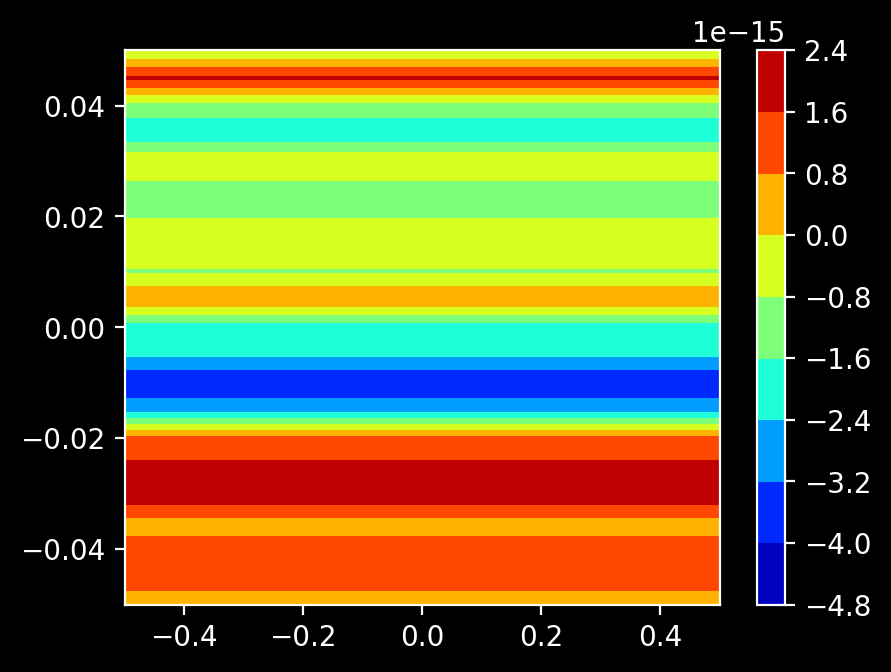

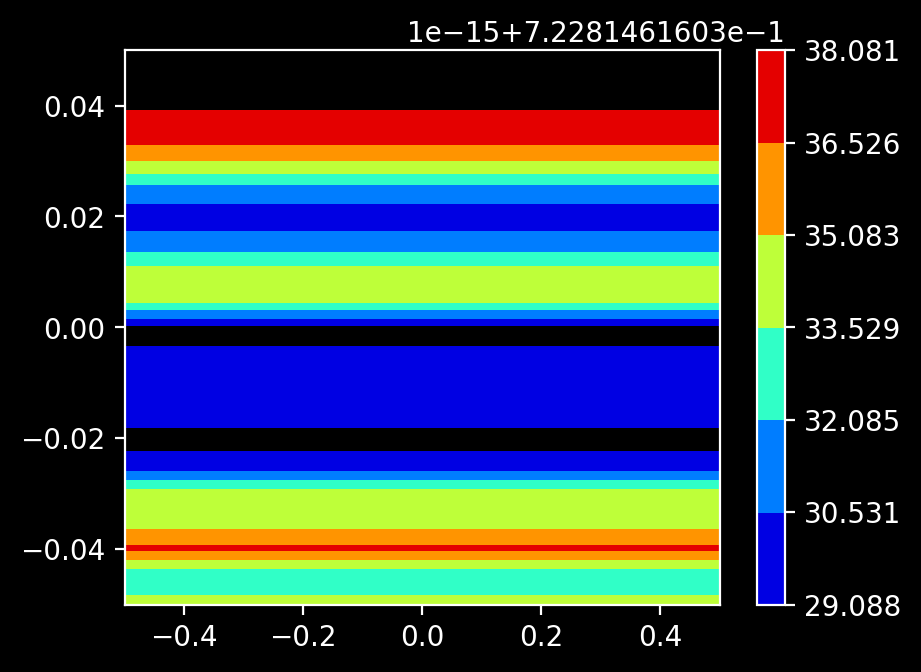

110
120
130
140
150
160
170
180
190
200


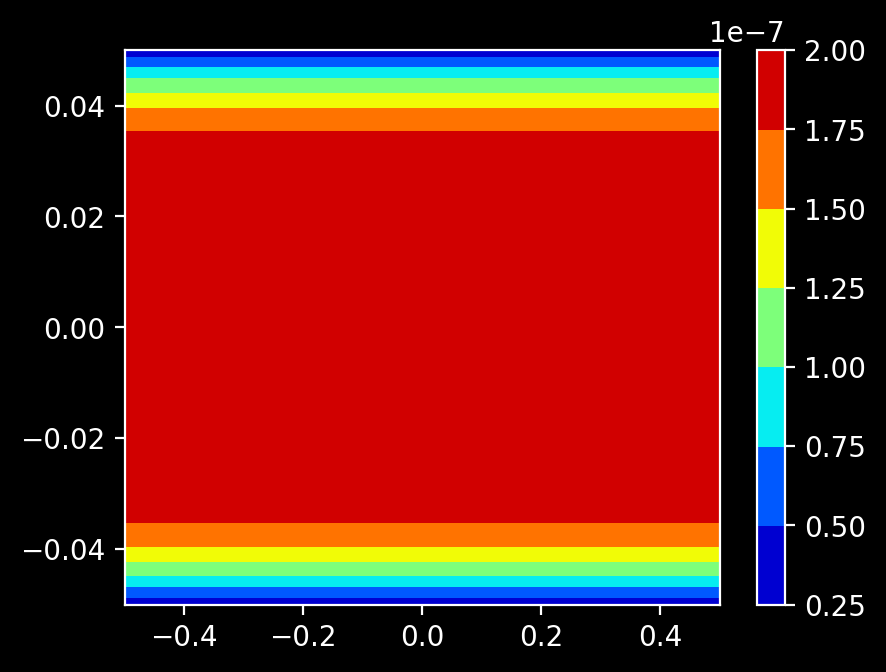

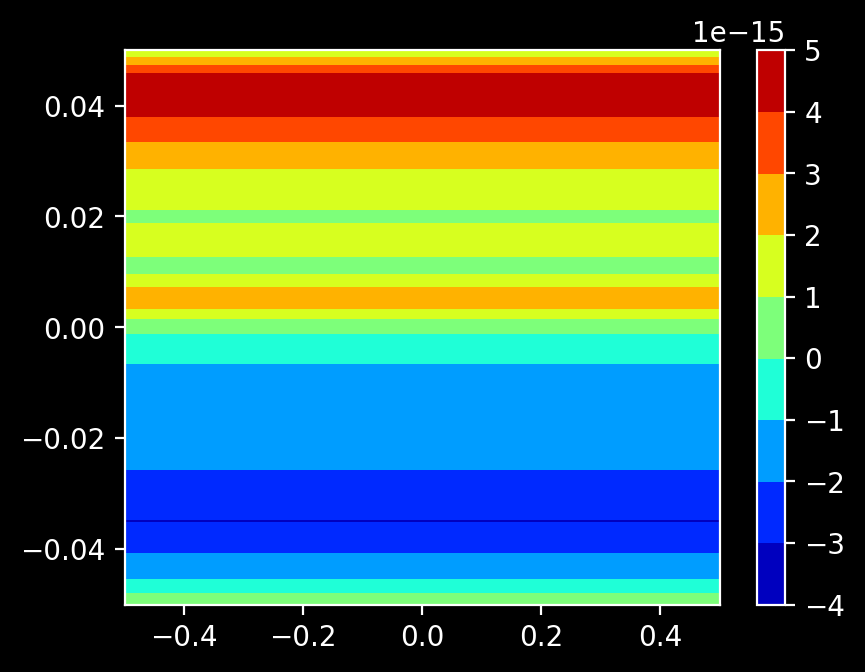

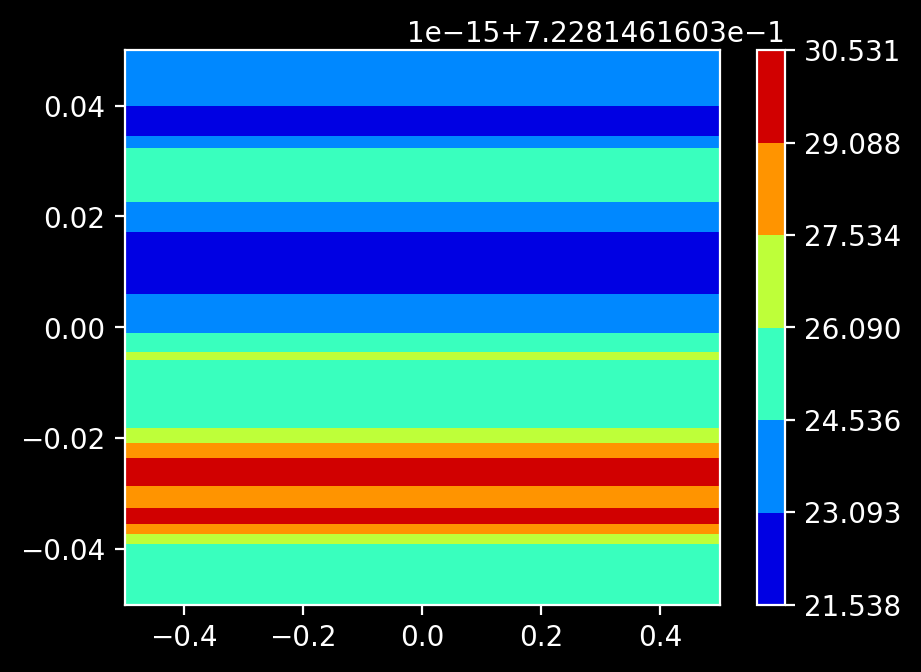

210
220


KeyboardInterrupt: 

In [6]:
ex, ey, w, cs = GetLatice(D=D,Q=Q)
# Calc tau
Nulb = (nu*Dt)/(Dx * Dx)
thau = (Nulb/(cs*cs)) + 0.5
# Scale Macro var 
rho = rho *((Rgas*Tref)/Pref)
vforce = vforce * ((Dt*Dt)/Dx)
#
levels1 = np.linspace(0.99, 1.11, 20)
levels2 = np.linspace(0.99, 1.11, 20)
levels3 = np.linspace(0.99, 1.11, 20)
#Temporal loop
f = CalcFeq(rho,ux,uy,ex,ey,w,cs,Nx,Ny,Q,thau,srct =[vforce,0])
for i in range(1001):
    feq = CalcFeq(rho,ux,uy,ex,ey,w,cs,Nx,Ny,Q,thau,srct =[vforce,0])
    fstar = Collision(f,feq,thau,Nx,Ny,Q,Bnd = label,with_boundaries = True)
    fold = fstar 
    fstream = Streaming(fstar,Nx,Ny,Q,Bnd = label,with_boundaries = True)
    f = fstream
    #fbnd = WallBnd(fold,f,label,normalx,normaly,Nx,Ny)
    fbnd = Bnd_HWBB(fold,f,label,normalx,normaly,Nx,Ny)
    f = fbnd
    ux,uy,rho = CalcMacro(fstream,ex,ey,Nx,Ny,Q)
    
    if i%10 == 0 :
        print(i)
    if i%100 == 0:
        #fig = plt.figure(figsize = (12,4))
        #ax1 = fig.add_subplot(131)
        #ax2 = fig.add_subplot(132)
        #ax3 = fig.add_subplot(133)
        #z1_plot=ax1.contourf(xv, yv, rho,cmap = 'jet')
        #ax2.contourf(xv, yv, ux,cmap = 'jet')
        #ax3.contourf(xv, yv, uy,cmap = 'jet')
        #fig.colorbar(z1_plot,cax=ax1)
        #plt.show()
        #plt.close()
        #
        plt.contourf(xv,yv,ux,cmap = 'jet')
        plt.colorbar()
        plt.show()
        plt.close()
        #
        plt.contourf(xv,yv,uy,cmap = 'jet')
        plt.colorbar()
        plt.show()
        plt.close()
        #
        plt.contourf(xv,yv,rho,cmap = 'jet')
        plt.colorbar()
        plt.show()
        plt.close()